# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#print to logger
print ("Beginning Data Retrieval")
print ("------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units-Imperial&APPID={weather_api_key}"

#list of city data
city_data = []

#create counters
record_count = 1
set_count = 1

#loop through the letters in our list
for i, city in enumerate(cities):
    
    #group the cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        #reset the group every 50 counts of cities
        set_count += 1
        record_count = 1
        
    #create the endpoint url for each city
    city_url = f"{url}&q={city}"
    
    #log the record and set number
    print (f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        #run API requests and retrieve the data
        city_weather = requests.get(city_url).json()
        
        #add a time delay to avoid blowing out the API key
        time.sleep(2)
        
        #parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # append the city information into city_data list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        #if an error occurs when making the API call, skip the city
        print(f"{city} has an error. Skipping...")
        pass
    
# indicate that Data loading is complete
print ("------------------------")
print ("Data Retrieval Complete")
print ("------------------------")

Beginning Data Retrieval
------------------------
Processing city #1 in group #1 | inndyr
Processing city #2 in group #1 | puerto escondido
Processing city #3 in group #1 | chokurdakh
Processing city #4 in group #1 | sabang
Processing city #5 in group #1 | severo-kurilsk
Processing city #6 in group #1 | jinchang
Processing city #7 in group #1 | port hedland
Processing city #8 in group #1 | port alfred
Processing city #9 in group #1 | iqaluit
Processing city #10 in group #1 | new norfolk
Processing city #11 in group #1 | bredasdorp
Processing city #12 in group #1 | douentza
Processing city #13 in group #1 | hilo
Processing city #14 in group #1 | half moon bay
Processing city #15 in group #1 | puerto ayora
Processing city #16 in group #1 | fortuna
Processing city #17 in group #1 | saint-augustin
Processing city #18 in group #1 | nanortalik
Processing city #19 in group #1 | guerrero negro
Processing city #20 in group #1 | atuona
Processing city #21 in group #1 | avarua
Processing city #22

Processing city #28 in group #4 | abu samrah
Processing city #29 in group #4 | kodiak
Processing city #30 in group #4 | kuliyapitiya
Processing city #31 in group #4 | salinas
Processing city #32 in group #4 | kadykchan
kadykchan has an error. Skipping...
Processing city #33 in group #4 | yerbogachen
Processing city #34 in group #4 | lakes entrance
Processing city #35 in group #4 | norman wells
Processing city #36 in group #4 | urk
Processing city #37 in group #4 | nome
Processing city #38 in group #4 | vila velha
Processing city #39 in group #4 | andradas
Processing city #40 in group #4 | kajansi
Processing city #41 in group #4 | te anau
Processing city #42 in group #4 | lixourion
Processing city #43 in group #4 | klyuchi
Processing city #44 in group #4 | sal rei
Processing city #45 in group #4 | sao domingos do prata
Processing city #46 in group #4 | saquena
Processing city #47 in group #4 | toliary
toliary has an error. Skipping...
Processing city #48 in group #4 | hofn
Processing ci

Processing city #50 in group #7 | palmer
Processing city #1 in group #8 | kostomuksha
Processing city #2 in group #8 | boyuibe
Processing city #3 in group #8 | hobyo
Processing city #4 in group #8 | rawson
Processing city #5 in group #8 | grand gaube
Processing city #6 in group #8 | rincon
Processing city #7 in group #8 | langsa
Processing city #8 in group #8 | alamosa
Processing city #9 in group #8 | charters towers
Processing city #10 in group #8 | prince rupert
Processing city #11 in group #8 | tumut
Processing city #12 in group #8 | knysna
Processing city #13 in group #8 | andenes
Processing city #14 in group #8 | yaan
Processing city #15 in group #8 | adrar
Processing city #16 in group #8 | nara
Processing city #17 in group #8 | berezovyy
Processing city #18 in group #8 | poshekhonye
Processing city #19 in group #8 | merauke
Processing city #20 in group #8 | souillac
Processing city #21 in group #8 | quatre cocos
Processing city #22 in group #8 | adre
Processing city #23 in group 

Processing city #29 in group #11 | griffith
Processing city #30 in group #11 | ilabaya
Processing city #31 in group #11 | pangnirtung
Processing city #32 in group #11 | riberalta
Processing city #33 in group #11 | san juan
Processing city #34 in group #11 | victoria
Processing city #35 in group #11 | port hardy
Processing city #36 in group #11 | potsdam
Processing city #37 in group #11 | gulu
Processing city #38 in group #11 | mnogovershinnyy
Processing city #39 in group #11 | general roca
Processing city #40 in group #11 | rafai
Processing city #41 in group #11 | kisangani
Processing city #42 in group #11 | ambilobe
Processing city #43 in group #11 | tartagal
Processing city #44 in group #11 | birin
Processing city #45 in group #11 | cassilandia
Processing city #46 in group #11 | omsukchan
Processing city #47 in group #11 | majene
Processing city #48 in group #11 | nogales
Processing city #49 in group #11 | nueve de julio
Processing city #50 in group #11 | douglas
Processing city #1 i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inndyr,67.0338,14.0276,275.17,77,100,6.65,NO,1644366605
1,puerto escondido,15.8500,-97.0667,298.61,69,75,6.69,MX,1644366607
2,chokurdakh,70.6333,147.9167,231.49,100,99,2.52,RU,1644366610
3,sabang,5.8933,95.3214,300.43,75,62,3.41,ID,1644366613
4,severo-kurilsk,50.6789,156.1250,272.52,94,96,12.34,RU,1644366615


In [5]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.626956,13.812876,283.113233,73.026643,54.699822,3.551616,1.644367e+09
std,33.562092,88.782229,17.079392,21.042179,42.080973,2.671249,4.193599e+02
min,-54.800000,-175.200000,231.490000,8.000000,0.000000,0.000000,1.644366e+09
25%,-9.790550,-62.535150,272.995000,63.500000,6.500000,1.555000,1.644367e+09
50%,22.293100,20.066700,289.430000,78.000000,72.000000,2.890000,1.644367e+09
75%,47.787150,92.688350,296.475000,88.000000,100.000000,4.990000,1.644368e+09
max,78.218600,179.316700,305.430000,100.000000,100.000000,18.070000,1.644368e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print (dirty_city_data)

Int64Index([], dtype='int64')


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inndyr,67.0338,14.0276,275.17,77,100,6.65,NO,1644366605
1,puerto escondido,15.8500,-97.0667,298.61,69,75,6.69,MX,1644366607
2,chokurdakh,70.6333,147.9167,231.49,100,99,2.52,RU,1644366610
3,sabang,5.8933,95.3214,300.43,75,62,3.41,ID,1644366613
4,severo-kurilsk,50.6789,156.1250,272.52,94,96,12.34,RU,1644366615


In [8]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

#Export the City_Dat into csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

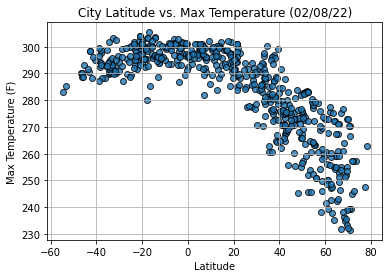

In [9]:
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save a png of the plot
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

## Latitude vs. Humidity Plot

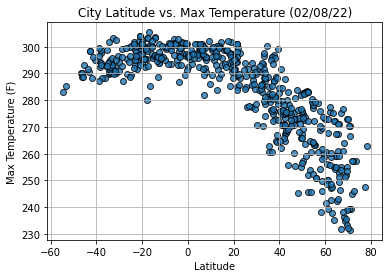

In [10]:
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save a png of the plot
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

## Latitude vs. Cloudiness Plot

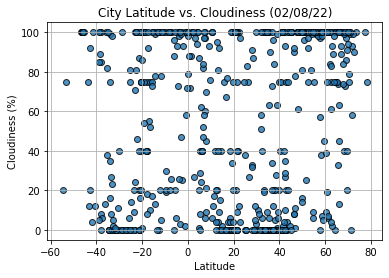

In [11]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save a png of the plot
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

## Latitude vs. Wind Speed Plot

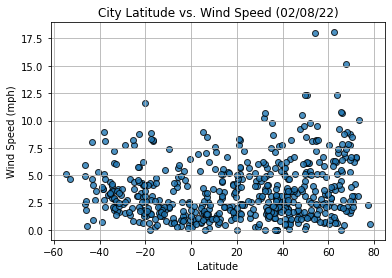

In [12]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save a png of the plot
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

## Linear Regression

In [13]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show

In [14]:
# Create Northern and Southern hemisphere data frames
north_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >=0)]
south_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7030968510860163


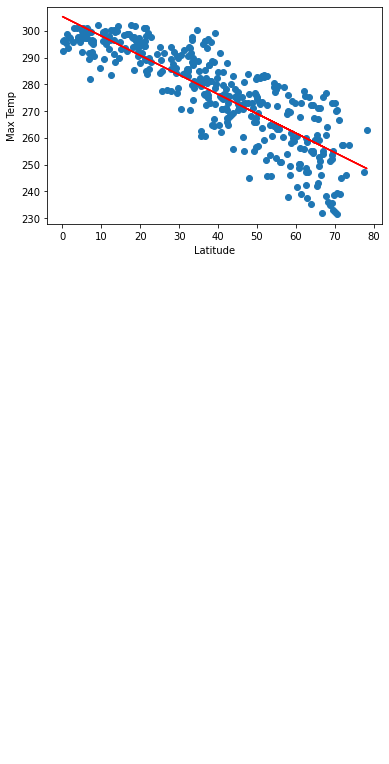

In [16]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.20098844012312964


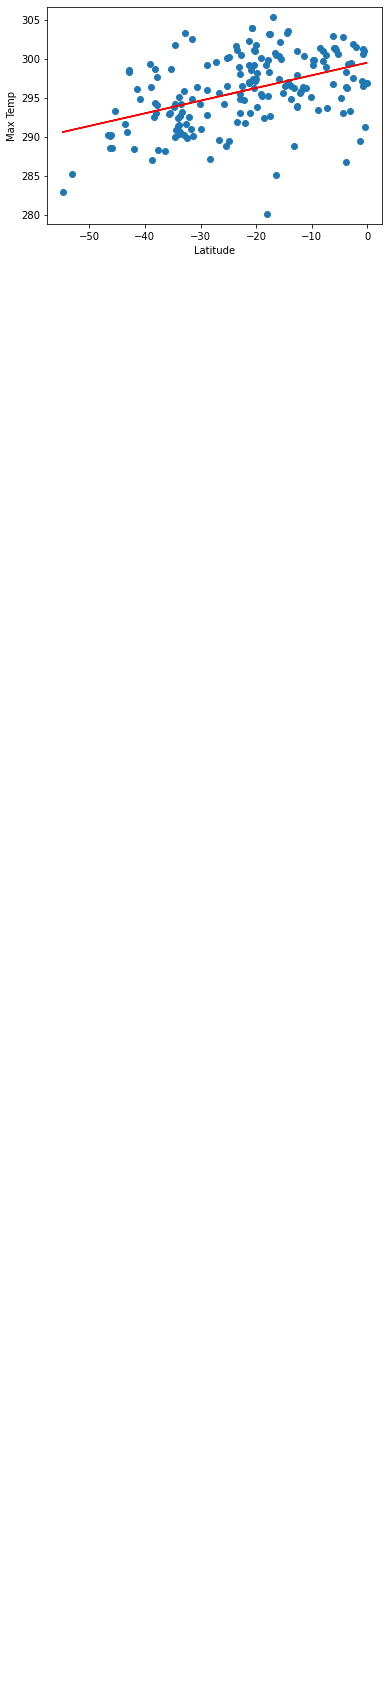

In [17]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13479751789810115


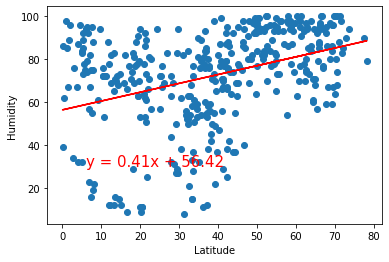

In [18]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (6, 30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15367078703588097


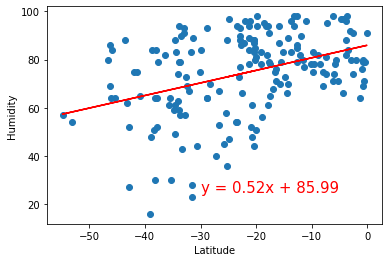

In [20]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-30, 25))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08026651623138009


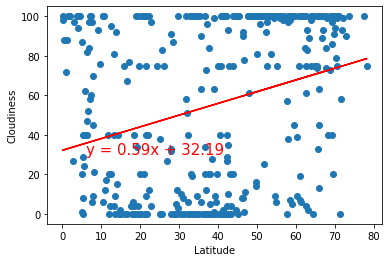

In [21]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (6, 30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04316399496747479


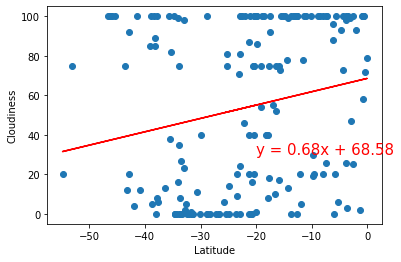

In [22]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-20, 30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06417380019645358


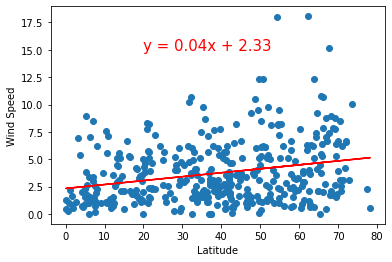

In [24]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (20, 15))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04715469491654553


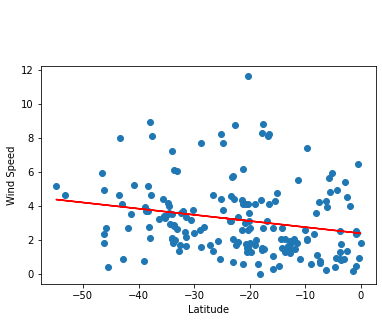

In [25]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30, 15))